**HANDWRITTEN DIGIT RECOGNITION USING CNN**

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1300 - accuracy: 0.9599 - val_loss: 0.0473 - val_accuracy: 0.9840
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0312 - val_accuracy: 0.9896
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0328 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0272 - val_accuracy: 0.9914
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0259 - accuracy: 0.9917
Test accuracy: 0.9916999936103821
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.9

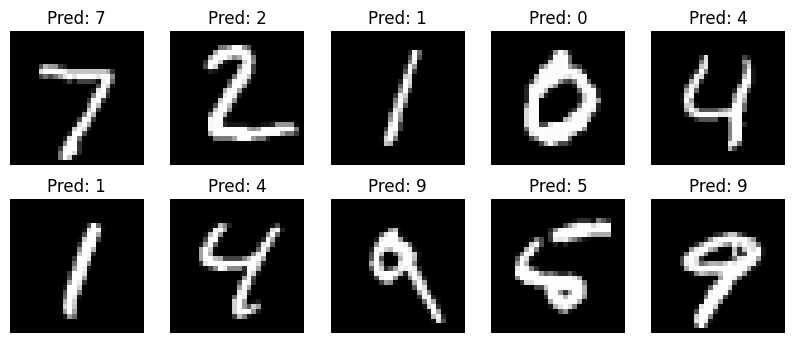

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)  # Keeping a categorical version of y_test for model evaluation

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test_cat))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test accuracy: {test_acc}')

# Make predictions
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot some example predictions
num_rows, num_cols = 2, 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')
plt.show()